<a href="https://colab.research.google.com/github/carmoldo/TP1-ModelosPredictivos/blob/main/Trabajo_Pr%C3%A1ctico_1_Modelos_Predictivos_en_SciKit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1- Investigar y seleccionar un dataset que cumpla con tener entre 1000 y 10.000 muestras, 5 o más atributos numéricos y al menos un atributo categórico

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
data = pd.read_csv('https://raw.githubusercontent.com/Mart1n610/Chona/main/movies.csv')
data

,title,year,runtime,certificate,genre,director,stars,rating,metascore,votes,gross
0,The Shawshank Redemption,1994,142,R,Drama,"['Frank Darabont', 'Tim Robbins', 'Morgan Free...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",9.3,82.0,2780534,28.34
1,The Godfather,1972,175,R,"Crime, Drama","['Francis Ford Coppola', 'Marlon Brando', 'Al ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",9.2,100.0,1935895,134.97
2,Ramayana: The Legend of Prince Rama,1993,135,PG,"Animation, Action, Adventure","['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski', 'Ar...","['Yûgô Sakô', 'Koichi Saski', 'Arun Govil', 'N...",9.2,NaN,12470,NaN
3,The Chaos Class,1975,87,NaN,"Comedy, Drama","['Ertem Egilmez', 'Kemal Sunal', 'Münir Özkul'...","['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...",9.2,NaN,42018,NaN
4,Daman,2022,121,NaN,"Adventure, Drama","['Lenka Debiprasad', 'Vishal Mourya', 'Karan K...","['Vishal Mourya', 'Karan Kandhapan', 'Babushan...",9.1,NaN,13372,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9844,Welcome to the Jungle,I) (2013,95,Not Rated,"Action, Adventure, Comedy","['Rob Meltzer', 'Jean-Claude Van Damme', 'Adam...","['Jean-Claude Van Damme', 'Adam Brody', 'Rob H...",4.9,25.0,13770,NaN
9845,Boat Trip,2002,94,R,Comedy,"['Mort Nathan', 'Cuba Gooding Jr.', 'Horatio S...","['Cuba Gooding Jr.', 'Horatio Sanz', 'Roselyn ...",4.9,18.0,31972,8.59
9846,Did You Hear About the Morgans?,2009,103,PG-13,"Comedy, Drama, Romance","['Marc Lawrence', 'Hugh Grant', 'Sarah Jessica...","['Hugh Grant', 'Sarah Jessica Parker', 'Sam El...",4.9,27.0,41830,29.58
9847,The Crow: Salvation,2000,102,R,"Action, Crime, Fantasy","['Bharat Nalluri', 'Kirsten Dunst', 'William A...","['Kirsten Dunst', 'William Atherton', 'Debbie ...",4.9,NaN,11938,NaN


2- Realizar un análisis exploratorio de los datos. Se recomienda utilizar
gráficos para visualizar la distribución de los datos y la correlación entre los atributos. Se recomienda utilizar la librería seaborn para realizar los gráficos.


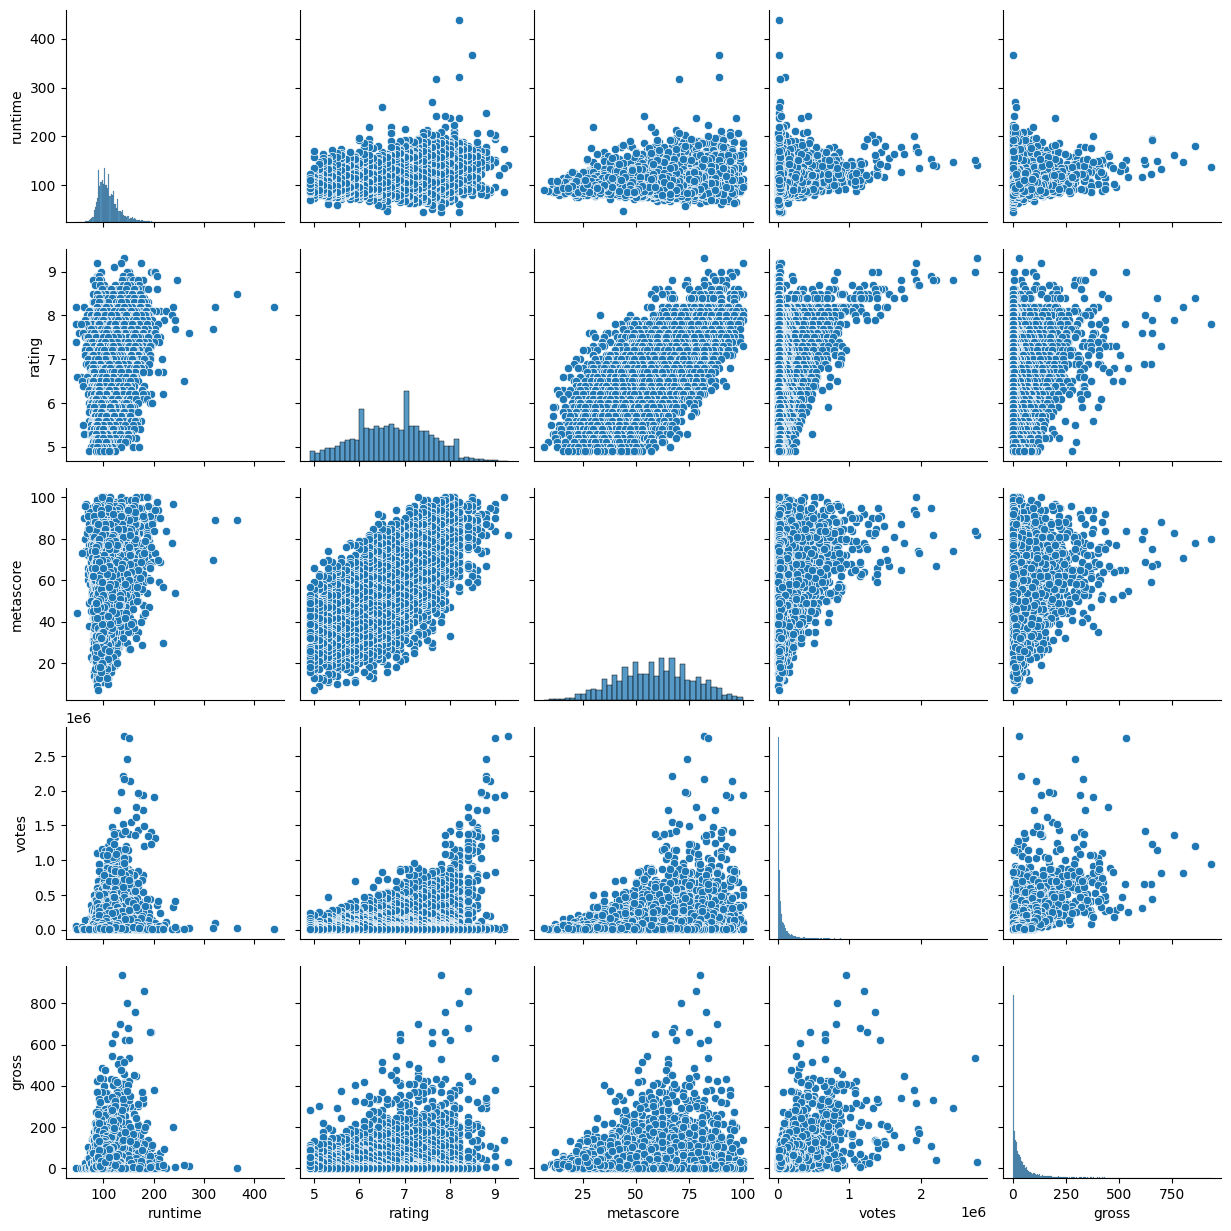

In [2]:
sns.pairplot(data)
plt.show()

3- Como resultado del análisis exploratorio, seleccionar un atributo categórico y un atributo numérico para realizar un modelo de clasificación. Se recomienda utilizar la función LabelEncoder de SciKit-Learn para convertir el atributo categórico a numérico.

In [17]:
y = data['genre']
X = data[['runtime']]
le = LabelEncoder()
y_encoded = le.fit_transform(y)

4- Realizar una partición de los datos en conjuntos de entrenamiento y test. La proporción con la cual hacen esta partición es libre. Se recomienda utilizar la función train_test_split de SciKit-Learn.

In [18]:
#X_train, X_test, y_train, y_test = train_test_split(data['genre'], data['director'])
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

5- Para el atributo numérico a predecir seleccionado:

  - Realizar un modelo de regresión lineal utilizando la clase LinearRegression de SciKit-Learn.
  
  - Realizar un modelo de Árbol de Decisión utilizando la clase DecisionTreeRegressor de SciKit-Learn. Seleccionar hiperparámetros que les parezca mejoren el modelo.


**Responder: ¿Que formas tienen de evaluar los resultados de cada árbol de decisión? ¿Como eligen "el mejor árbol"? ¿Como se comparan los resultados de los modelos de regresión lineal y de árbol de decisión?**

Para determinar si un modelo predictivos, ya sea de regresion lineal o un arbol de decision, es bueno o malo necesitamos de una metrica que nos permita evaluarlo. Existen muchas metricas posibles y todas ellas se basan en la diferencia entre el valor observado y el valor predicho.
Una de las metricas mas utilizadas es el Error Cudratico Medio (ECM).
Para evaluar correctamente estos modelos, se debe determinar el ECM sobre un conjunto de datos separados (antes de entrenar/correr el modelo), estos llamados datos de testeo (los que separe con train y test).
En principio, elijo el mejor arbol a aquel que tenga menor error.
Si la metrica seleccionada es el ECM, el mejor arbol es aquel que tenga menor ECM.
Por otra parte, los arboles de decision tienen ramas, y si construimos un arbol con muchas ramas pueden surgir problemas computacionales y de overfitting. De esta forma, elijiremos el que tenga el menor error, el costo computacional buscado y sin overffitng.
Para comparar los resultados de los modelos de regresion lineal y de arbol de decision, vamos a elegir mas de una metrica de error, y de esta forma vemos que modelo nos conviene usar.

Mean Squared Error: 14126.633495444028


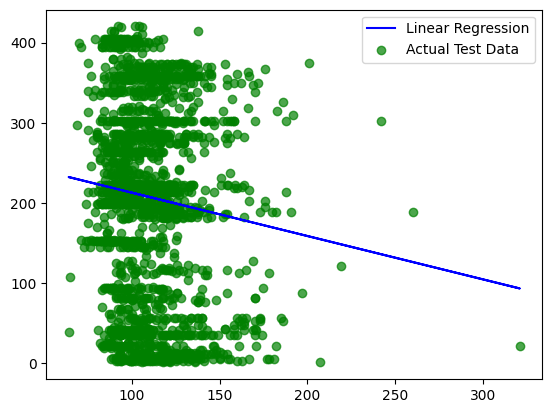

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



LR = LinearRegression().fit(X_train, y_train)
predicted = LR.predict(X_test)
plt.plot(X_test, predicted, label='Linear Regression', color='b')
plt.scatter(X_test, y_test, label='Actual Test Data', color='g', alpha=.7)
plt.legend()
plt.show()
#elegimos un dataset muy malo:c

In [6]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)

tree_regressor.fit(X_train, y_train)
y_pred_tree = tree_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred_tree)
print("Mean Squared Error:", mse)

Mean Squared Error: 14285.455914923958


6- Para el atributo categórico a predecir seleccionado:

- Realizar un modelo de clasificación utilizando la clase LogisticRegression de SciKit-Learn.

- Realizar un modelo de clasificación utilizando la clase DecisionTreeClassifier de SciKit-Learn.

**Responder las mismas preguntas que en el punto 5 para este caso:**

En los modelos de clasificacion o regresion logistica (es otro modelo de clasificacion), no podemos utilizar metricas como el ECM para evaluarlo, esto se debe a que el modelo acierta o no acierta, no hay una "distancia" cuantificable entre la prediccion y la observacion.
Una forma muy usada para ervaluar cualquier modelo de clasificacion, es usando la matriz de confusion.
Una medida de la calidad del modelo que se puede construir a partir de esta matriz de confusion es determianr el cociente entre la cantidad de aciertos y el tamaño de la muestra de testeo.
A partir de la matriz de confusion, podemos construir muchas metricas que nos ayudan a elegir el mejor modelo de clasificacion. Dependiendo del problema usaremos una metrica u otra. Por ejemplo, existen problematicas donde tener falsos positivos es inadmicible mientras otras resulta conveniente evitar los falsos negativos.



In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression_model.fit(X_train_scaled, y_train)

y_pred = logistic_regression_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.06598984771573604


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)
y_pred_tree = tree_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_tree)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.04365482233502538


**7- Comparar distintos métodos de validación cruzada. ¿Que ventajas y desventajas tiene cada uno?**

La validacion cruzada es de gran utlidad cuando no contamos con una gran cantidad de datos. La validacion cruzada nos permite ir haciendo una evaluacion del modelo sobre los datos de entrenamiento y de esta forma desarollar algoritmos que automatizern la determinacion de los hiperparametros ademas la validacion crusada es de utilizadad para prevenir el overfitting.
Dos de los metodos mas utilizados son el K-Fold y Leave One Out (LOO).

En K-Fold, divides tus datos en partes ("folds") y pruebas el modelo varias veces, usando diferentes partes para entrenar y probar. Luego, promedias los resultados.
LOO es más "minucioso". Pruebas el modelo una vez por cada punto de datos, dejando uno fuera cada vez. Esto garantiza que no te equivoques, pero es lento y costoso computacionalmente.

La decisión entre usar K-Fold o Leave-One-Out depende de tus datos y lo que necesitas. K-Fold es más rápido y generalmente da resultados cercanos, pero a veces puede estar un poco equivocado.
Leave-One-Out no se equivoca, pero lleva mucho tiempo y a veces da resultados que saltan mucho.
En la mayoría de los casos, K-Fold es como el punto medio perfecto entre rapidez y precisión. Pero si tienes pocos datos o necesitas estar seguro de que no te equivocas ni un poco, entonces usa Leave-One-Out.

**8- Escribir una conclusión sobre el trabajo realizado.**

En este trabajo práctico, se realizó un proceso completo de análisis de datos y modelado utilizando un dataset seleccionado cuidadosamente. Primero, se encontró un dataset que cumple con los requisitos de tener entre 1000 y 10,000 muestras, 5 o más atributos numéricos y al menos un atributo categórico. Se destacó la importancia de corroborar el dataset en clase para asegurar su calidad y adecuación.

Luego, se realizó un análisis exploratorio de los datos, aprovechando la biblioteca Seaborn para visualizar la distribución y correlación de los atributos. Se seleccionaron un atributo categórico y uno numérico para realizar modelos de clasificación.

La partición de los datos en conjuntos de entrenamiento y prueba permitió el desarrollo de modelos de regresión lineal y árbol de decisión para el atributo numérico y modelos de clasificación con regresión logística y árbol de decisión para el atributo categórico.

La evaluación de modelos se basó en métricas específicas para regresión y clasificación, y se utilizó la validación cruzada para evaluar la robustez de los modelos.

En cuanto a la comparación de métodos de validación cruzada, se destacaron las ventajas y desventajas de diferentes enfoques, como K-Fold y Leave-One-Out.